In [1]:
# Import Libraries
import cv2
import numpy as np
import pandas as pd
from skimage.feature import hog
from skimage.io import imread
from scipy.misc import imresize
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
from sklearn.externals import joblib
from skimage.feature import hog
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
import time
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from moviepy.editor import VideoFileClip
from scipy.ndimage.measurements import label
%matplotlib inline
print('Loaded')

Loaded


In [2]:
def read_dataset():
    # Make a list of Vehicle & Non Vehicle image locations
    car_images1 = glob.glob('./vehicles/GTI_Far/*.png')
    car_images2 = glob.glob('./vehicles/GTI_Left/*.png')
    car_images3 = glob.glob('./vehicles/GTI_MiddleClose/*.png')
    car_images4 = glob.glob('./vehicles/GTI_Right/*.png')
    car_images5 = glob.glob('./vehicles/KITTI_extracted/*.png')

    notcar_images1 = glob.glob('./non-vehicles/Extras/*.png')
    notcar_images2 = glob.glob('./non-vehicles/GTI/*.png')

    cars = []
    notcars = []

    for image1 in car_images1:
        cars.append(image1)

    for image2 in car_images2:
        cars.append(image2)

    for image3 in car_images3:
        cars.append(image3)

    for image4 in car_images4:
        cars.append(image4)

    for image5 in car_images5:
        cars.append(image5)    

    for image6 in notcar_images1:
        notcars.append(image6)

    for image7 in notcar_images2:
        notcars.append(image7) 
    
    return cars, notcars

In [3]:
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    out_img = np.copy(img)
    for b in bboxes:
        cv2.rectangle(out_img, *b, color, thick)
    return out_img

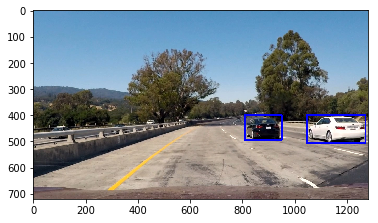

In [4]:
#to test
IMG = imread('test_images/test1.jpg')
bboxes = [((810,400),(950,495)),((1045,400),(1270,505))]
plt.imshow(draw_boxes(IMG, bboxes=bboxes));

In [5]:
#Function to Return Dict of data
def data_look(car_list, notcar_list):
    
    data_dict = {}
    # Define a key in data_dict "n_cars" and store the number of car images
    data_dict["n_cars"] = len(car_list)
    # Define a key "n_notcars" and store the number of notcar images
    data_dict["n_notcars"] = len(notcar_list)
    # Read in a test image, either car or notcar
    example_img = mpimg.imread(car_list[0])
    # Define a key "image_shape" and store the test image shape 3-tuple
    data_dict["image_shape"] = example_img.shape
    # Define a key "data_type" and store the data type of the test image.
    data_dict["data_type"] = example_img.dtype
    # Return data_dict
    return data_dict


#Function to Return Car and Not-car Images
def plot_car(cars, notcars):
    data_info = data_look(cars, notcars)

    print('Your function returned a count of', 
          data_info["n_cars"], ' cars and', 
          data_info["n_notcars"], ' non-cars')
    print('of size: ',data_info["image_shape"], ' and data type:', 
          data_info["data_type"])
    # Just for fun choose random car / not-car indices and plot example images   
    car_ind = np.random.randint(0, len(cars))
    notcar_ind = np.random.randint(0, len(notcars))

    # Read in car / not-car images
    car_image = mpimg.imread(cars[car_ind])
    notcar_image = mpimg.imread(notcars[notcar_ind])

    # Plot the examples
    fig = plt.figure()
    plt.subplot(121)
    plt.imshow(car_image)
    plt.title('Example Car Image')
    plt.subplot(122)
    plt.imshow(notcar_image)
    plt.title('Example Not-car Image')


# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block, vis=False, feature_vec=True):
    if vis == True:
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=False, 
                                  visualise=True, feature_vector=False)
        return features, hog_image
    else:      
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=False, 
                       visualise=False, feature_vector=feature_vec)
        return features

#Function to plot Hog images of Car/Not-Car    
def plot_hog(cars, notcars):    
    #cars, notcars = read_dataset()
    # Define HOG parameters
    orient = 9
    pix_per_cell = 8
    cell_per_block = 2
    hog_channel = "ALL"
    
    for x in range(0,3):
    
        # Generate a random index to look at a car image
        ind = np.random.randint(0, len(cars))
        # Read in the image
        image_car = mpimg.imread(cars[ind])
        gray_car = cv2.cvtColor(image_car, cv2.COLOR_RGB2GRAY)
        
        image_notcar = mpimg.imread(notcars[ind])
        gray_notcar = cv2.cvtColor(image_notcar, cv2.COLOR_RGB2GRAY)
        
        # Call our function with vis=True to see an image output
        features_car, hog_image_car = get_hog_features(gray_car, orient, 
                                pix_per_cell, cell_per_block, 
                                vis=True, feature_vec=False)
        
        features_notcar, hog_image_notcar = get_hog_features(gray_notcar, orient, 
                                pix_per_cell, cell_per_block, 
                                vis=True, feature_vec=False)
        
        # Plot the examples
        fig = plt.figure()
        plt.subplot(121)
        plt.imshow(image_car, cmap='gray')
        plt.title('Example Car Image')
        plt.subplot(122)
        plt.imshow(hog_image_car, cmap='gray')
        plt.title('Car HOG Visualization')
        
        fig = plt.figure()
        plt.subplot(121)
        plt.imshow(image_notcar, cmap='gray')
        plt.title('Example Non-car Visualization')
        plt.subplot(122)
        plt.imshow(hog_image_notcar, cmap='gray')
        plt.title('Non-Car HOG Visualization')        
        x = x+1



Your function returned a count of 8792  cars and 8968  non-cars
of size:  (64, 64, 3)  and data type: float32


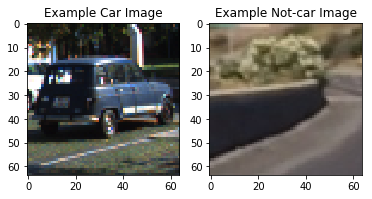

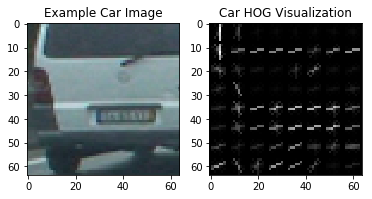

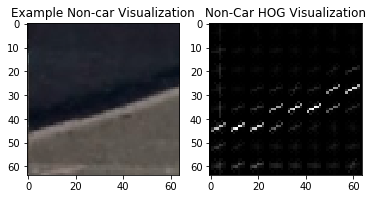

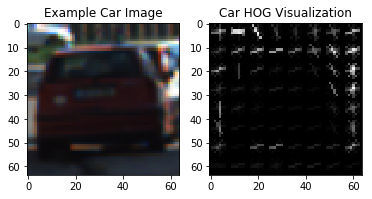

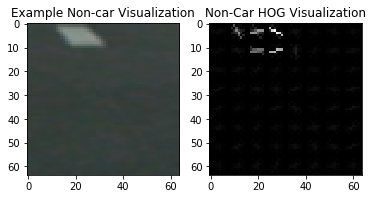

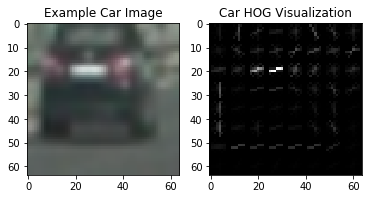

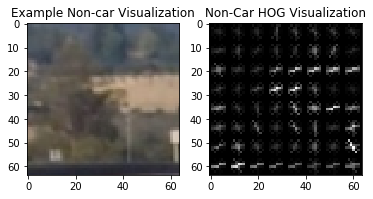

In [6]:
cars, notcars = read_dataset()
plot_car(cars,notcars)    
plot_hog(cars,notcars)

In [7]:
# Function to compute Spatial Bins
def bin_spatial2(img, size=(32, 32)):
    color1 = cv2.resize(img[:,:,0], size).ravel()
    color2 = cv2.resize(img[:,:,1], size).ravel()
    color3 = cv2.resize(img[:,:,2], size).ravel()
    return np.hstack((color1, color2, color3))


# Function to compute binned color features  
def bin_spatial(img, size=(32, 32)):
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(img, size).ravel() 
    # Return the feature vector
    return features


# Function to compute color histogram features  
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features

In [29]:
# Function to extract all features from single image 
def single_img_features(image, color_space='RGB', spatial_size=(32, 32),
                    hist_bins=32, orient=9, 
                    pix_per_cell=8, cell_per_block=2, hog_channel=0,
                    spatial_feat=True, hist_feat=True, hog_feat=True):

    img_features = []
    # Read in each one by one
    #image = mpimg.imread(file)
    # apply color conversion if other than 'RGB'
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
    else: feature_image = np.copy(image)      

    if spatial_feat == True:
        spatial_features = bin_spatial(feature_image, size=spatial_size)
        img_features.append(spatial_features)
        #print('spatial_features '  ,len(spatial_features))
    if hist_feat == True:
        # Apply color_hist()
        hist_features = color_hist(feature_image, nbins=hist_bins)
        img_features.append(hist_features)
        #print('hist_features ',len(hist_features))
    if hog_feat == True:
    # Call get_hog_features() with vis=False, feature_vec=True
        if hog_channel == 'ALL':
            hog_features = []
            #print(feature_image.shape)
            for channel in range(feature_image.shape[2]):
                hog_features.extend(get_hog_features(feature_image[:,:,channel], 
                                    orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec=True))
            hog_features = np.ravel(hog_features)        
        else:
            hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                        pix_per_cell, cell_per_block, vis=False, feature_vec=True)
        # Append the new feature vector to the features list
        #print(len(hog_features))
        img_features.append(hog_features)
        
    return np.concatenate(img_features)

In [9]:
cs= 'YCrCb'
orient = 9
pix_per_cell = 8
cell_per_block = 2
hog_channel = "ALL"
spatial_size = (32, 32) # Spatial binning dimensions
hist_bins = 32   # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off
y_start_stop = [None, None] # Min and max in y to search in slide_window()
# Generate a random index to look at a car image
ind = np.random.randint(0, len(cars))
image_car = mpimg.imread(cars[ind])
print(image_car.shape)
car_features = single_img_features(image_car, color_space=cs, 
                    spatial_size=spatial_size, hist_bins=hist_bins, 
                    orient=orient, pix_per_cell=pix_per_cell, 
                    cell_per_block=cell_per_block, 
                    hog_channel=hog_channel, spatial_feat=spatial_feat, 
                    hist_feat=hist_feat, hog_feat=hog_feat)

print(len(car_features))
#test_features = scaler.transform(np.array(car_features).reshape(1, -1))
#print(len(test_features))

(64, 64, 3)
spatial_features  3072
hist_features  96
(64, 64, 3)
5292
8460


In [12]:

# Function to extract all features  
def extract_features(imgs, color_space='RGB', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        file_features = []
        # Read in each one by one
        image = mpimg.imread(file)
        # apply color conversion if other than 'RGB'
        if color_space != 'RGB':
            if color_space == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif color_space == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif color_space == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif color_space == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
            elif color_space == 'YCrCb':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
        else: feature_image = np.copy(image)      

        if spatial_feat == True:
            spatial_features = bin_spatial(feature_image, size=spatial_size)
            file_features.append(spatial_features)
        if hist_feat == True:
            # Apply color_hist()
            hist_features = color_hist(feature_image, nbins=hist_bins)
            file_features.append(hist_features)
        if hog_feat == True:
        # Call get_hog_features() with vis=False, feature_vec=True
            if hog_channel == 'ALL':
                hog_features = []
                for channel in range(feature_image.shape[2]):
                    hog_features.extend(get_hog_features(feature_image[:,:,channel], 
                                        orient, pix_per_cell, cell_per_block, 
                                        vis=False, feature_vec=True))
                hog_features = np.ravel(hog_features)        
            else:
                hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                            pix_per_cell, cell_per_block, vis=False, feature_vec=True)
            # Append the new feature vector to the features list
            file_features.append(hog_features)
        features.append(np.concatenate(file_features))
    # Return list of feature vectors
    return features


# Function to convert Image color
def convert_color(img, conv='RGB2YCrCb'):
    if conv == 'RGB2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    if conv == 'BGR2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    if conv == 'RGB2LUV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2LUV)


In [13]:
# Function to Train Classifier using HOG features
def train_hog(cars, notcars):    
    # Here are the Parameters used in the project
    cs= 'YCrCb'
    orient = 9
    pix_per_cell = 8
    cell_per_block = 2
    hog_channel = "ALL"
    spatial_size = (32, 32) # Spatial binning dimensions
    hist_bins = 32   # Number of histogram bins
    spatial_feat = True # Spatial features on or off
    hist_feat = True # Histogram features on or off
    hog_feat = True # HOG features on or off
    y_start_stop = [None, None] # Min and max in y to search in slide_window()
    
    car_features = extract_features(cars, color_space=cs, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)
    notcar_features = extract_features(notcars, color_space=cs, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)
    return car_features , notcar_features 
    




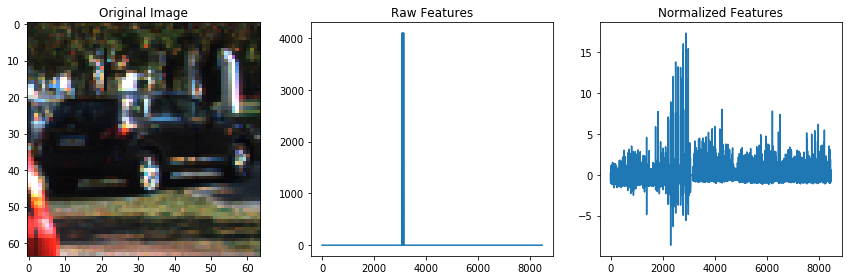

In [14]:
car_features = []
notcar_features = []
X_scaler = []
scaled_X =[]
car_features , notcar_features = train_hog(cars, notcars)
if len(car_features) > 0:
    # Create an array stack of feature vectors
    X = np.vstack((car_features, notcar_features)).astype(np.float64)                 
    # Fit a per-column scaler
    X_scaler = StandardScaler().fit(X)
    # Apply the scaler to X
    scaled_X = X_scaler.transform(X)
    car_ind = np.random.randint(0, len(cars))
    # Plot an example of raw and scaled features
    fig = plt.figure(figsize=(12,4))
    plt.subplot(131)
    plt.imshow(mpimg.imread(cars[car_ind]))
    plt.title('Original Image')
    plt.subplot(132)
    plt.plot(X[car_ind])
    plt.title('Raw Features')
    plt.subplot(133)
    plt.plot(scaled_X[car_ind])
    plt.title('Normalized Features')
    fig.tight_layout()
else: 
    print('Empty feature vectors...')

In [15]:
# Preparing Labels, and split for Training and Test data
    # Here are the Parameters used in the project
cs= 'YCrCb'
orient = 9
pix_per_cell = 8
cell_per_block = 2
hog_channel = "ALL"
spatial_size = (32, 32) # Spatial binning dimensions
hist_bins = 32   # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off
labels = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))
#rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, labels, test_size=0.2, random_state=4000)
print('Using:',orient,'orientations',pix_per_cell,
      'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))

Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 8460


In [16]:
svc = LinearSVC()
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()

print('SVC results')
print(t2-t, 'Seconds to train SVC...')
print('accuracy on training data: ', svc.score(X_train, y_train))
print('accuracy on test data: ', svc.score(X_test, y_test))
t=time.time()
prediction = svc.predict(X_test[0].reshape(1, -1))
t2 = time.time()
print(t2-t, 'Seconds to predict with SVC')

SVC results
24.180999994277954 Seconds to train SVC...
accuracy on training data:  1.0
accuracy on test data:  0.989864864865
0.0019998550415039062 Seconds to predict with SVC


In [17]:
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(max_iter=10)
t=time.time()
lrc.fit(X_train, y_train)
t2 = time.time()
print(t2-t, 'Seconds to train LRC...')
print('Train Accuracy of LRC = ', lrc.score(X_train, y_train))
print('Test Accuracy of LRC = ', lrc.score(X_test, y_test))
t=time.time()
prediction = lrc.predict(X_test[0].reshape(1, -1))
t2 = time.time()
print(t2-t, 'Seconds to predict with LRC')

43.76300001144409 Seconds to train LRC...
Train Accuracy of LRC =  1.0
Test Accuracy of LRC =  0.990709459459
0.0010001659393310547 Seconds to predict with LRC


In [18]:
mlp = MLPClassifier(random_state=999)
t=time.time()
mlp.fit(X_train, y_train)
t2 = time.time()
print('MLP results')
print(t2-t, 'Seconds to train MLP...')

print('accuracy on training data: ', mlp.score(X_train, y_train))
print('accuracy on test data: ', mlp.score(X_test, y_test))
t=time.time()
prediction = mlp.predict(X_test[0].reshape(1, -1))
t2 = time.time()
print(t2-t, 'Seconds to predict with MLP')

MLP results
37.37000012397766 Seconds to train MLP...
accuracy on training data:  1.0
accuracy on test data:  0.996621621622
0.0009999275207519531 Seconds to predict with MLP


In [19]:
# Visualize a confusion matrix of the predictions from the MLP
pred = mlp.predict(X_test)
cm = pd.DataFrame(confusion_matrix(pred, y_test))
cm

,0,1
0,1771,10
1,2,1769


In [20]:
# Save MLP and Scaler
joblib.dump(mlp, 'mlp1.pkl')
joblib.dump(X_scaler, 'scaler1.pkl')

['scaler1.pkl']

In [ ]:
# Load MLP and Scaler
mlp = joblib.load('mlp1.pkl')
X_scaler = joblib.load('scaler1.pkl')

In [21]:
def slide_window(img, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(64, 64), xy_overlap=(0.75, 0.75)):
    # If x and/or y start/stop positions not defined, set to image size
    if x_start_stop[0] == None:
        x_start_stop[0] = 0
    if x_start_stop[1] == None:
        x_start_stop[1] = img.shape[1]
    if y_start_stop[0] == None:
        y_start_stop[0] = 0
    if y_start_stop[1] == None:
        y_start_stop[1] = img.shape[0]
    # Compute the span of the region to be searched    
    xspan = x_start_stop[1] - x_start_stop[0]
    yspan = y_start_stop[1] - y_start_stop[0]
    # Compute the number of pixels per step in x/y
    nx_pix_per_step = np.int(xy_window[0]*(1 - xy_overlap[0]))
    ny_pix_per_step = np.int(xy_window[1]*(1 - xy_overlap[1]))
    # Compute the number of windows in x/y
    nx_windows = np.int(xspan/nx_pix_per_step) 
    ny_windows = np.int(yspan/ny_pix_per_step)
    # Initialize a list to append window positions to
    window_list = []
    # Loop through finding x and y window positions
    # Note: you could vectorize this step, but in practice
    # you'll be considering windows one by one with your
    # classifier, so looping makes sense
    for ys in range(ny_windows):
        for xs in range(nx_windows):
            # Calculate window position
            startx = xs*nx_pix_per_step + x_start_stop[0]
            endx = (xs+1)*nx_pix_per_step + x_start_stop[0]
            starty = ys*ny_pix_per_step + y_start_stop[0]
            endy = (ys+1)*ny_pix_per_step + y_start_stop[0]
            # Append window position to list
            window_list.append(((startx, starty), (endx, endy)))
    # Return the list of windows
    return window_list

In [36]:
def annotate(image):
    image = imread(image)
    result = np.copy(image)
    image = image.astype(np.float32)/255
    detected = []
    size = 320
    count = 0
    # Here are the Parameters used in the project
    cs= 'YCrCb'
    orient = 9
    pix_per_cell = 8
    cell_per_block = 2
    hog_channel = "ALL"
    spatial_size = (32, 32) # Spatial binning dimensions
    hist_bins = 32   # Number of histogram bins
    spatial_feat = True # Spatial features on or off
    hist_feat = True # Histogram features on or off
    hog_feat = True # HOG features on or off
    y_start_stop = [None, None] # Min and max in y to search in slide_window()
    while size < 720:
        windows = slide_window(image, x_start_stop=[None, None], y_start_stop=[400, 660], 
                            xy_window=(size, size), xy_overlap=(0.8, 0.8))  
        for window in windows:
            wfeatures = []
            file_features = []
            current = cv2.resize((image[window[0][1]: window[1][1], window[0][0]: window[1][0]]),(64,64))
            #print(current.shape)
            hog_features_curr = single_img_features(current, color_space=cs, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                            hist_feat=hist_feat, hog_feat=hog_feat)
            scaled_features = X_scaler.transform(np.array(hog_features_curr).reshape(1, -1))
            if current.shape[0] > 0:
                if mlp.predict_proba(scaled_features.reshape(1,-1))[0][1] > .99:
                    detected.append(window)
            count += 1
        size += 16
    #result = np.copy(image)
    mask = np.zeros_like(result)
    # Draw all of the boxes on a mask image
    mask = draw_boxes(mask, bboxes=detected, thick=-1)
    # Find the contours in the mask
    im2, contours, hierarchy = cv2.findContours(mask[:,:,2].astype('uint8'),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contours:
        # Get the coordinates of a bounding rect for each contour
        x,y,w,h = cv2.boundingRect(cnt)
        # Draw the bounding rectangles on the result image
        cv2.rectangle(result, (x, y), (x + w, y + h), (0,255,0), 6)
        M = cv2.moments(cnt)
        c = (int(M['m10'] / M['m00']), int(M['m01'] / M['m00']))
        cv2.circle(result, c, 15, (255, 0, 0), -1)
    f, (ax1,ax2, ax3) = plt.subplots(1,3, figsize=(10,6))
    f.tight_layout()
    ax1.axis('off')
    ax1.set_title('Image')
    ax1.imshow(image)
    ax2.axis('off')
    ax2.set_title('Car Detections')
    ax2.imshow(mask, cmap='hot')
    ax3.axis('off')
    ax3.set_title('Annotated Image')
    ax3.imshow(result)

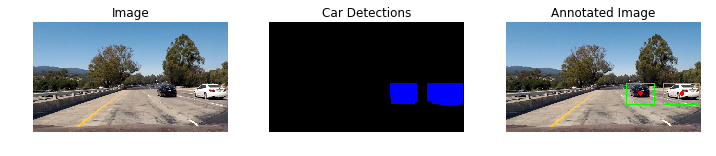

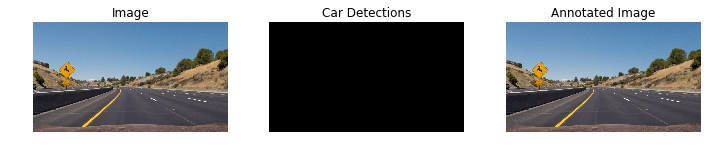

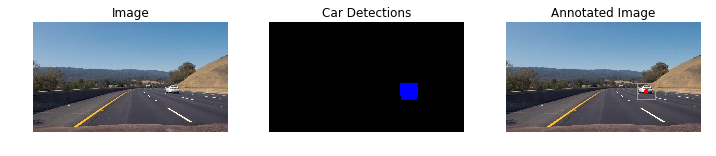

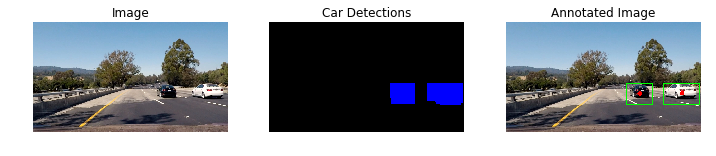

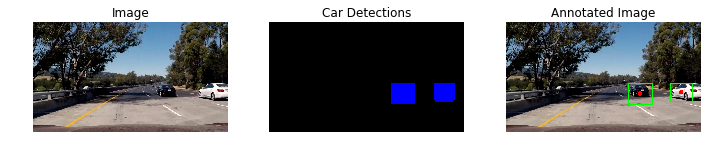

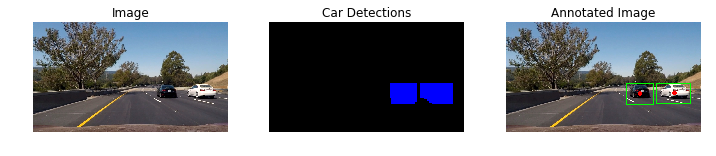

In [37]:
for image in glob.glob('test_images/*.jpg'):
    annotate(image);

In [38]:
from collections import deque
class boxes:
    def __init__(self):
        self.count = 0
        self.detections = deque(maxlen=12)

In [44]:
def process_vid(image):
    detected = [] 
    size = 320
    count = 0
    result = np.copy(image)
    image = image.astype(np.float32)/255
    while size < 720:
        windows = slide_window(image, x_start_stop=[640, None], y_start_stop=[400, 660], 
                            xy_window=(size, size), xy_overlap=(0.8, 0.8))  
        for window in windows:
            features = []
            current = cv2.resize((image[window[0][1]: window[1][1], window[0][0]: window[1][0]]),(64,64))
            all_features_curr = single_img_features(current, color_space=cs, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                            hist_feat=hist_feat, hog_feat=hog_feat)
            scaled_features = X_scaler.transform(np.array(all_features_curr).reshape(1, -1))
            if current.shape[0] > 0:
                if mlp.predict_proba(scaled_features.reshape(1, -1))[0][1] > .99:
                    detected.append(window)
            count += 1
        size += 16
    #result = np.copy(image).astype('uint8')
    mask = np.zeros_like(result)
    mask = draw_boxes(mask, bboxes=detected, thick=-1)
    rect_list = []
    im2, contours, hierarchy = cv2.findContours(mask[:,:,2].astype('uint8'),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contours:
        x,y,w,h = cv2.boundingRect(cnt)
        rect_list.append([x,y,x+w,y+h])
    Boxes.detections.append(rect_list)
    all_boxes = []
    combined = np.ravel(np.array(Boxes.detections))
    for i in range(len(combined)):
        all_boxes.extend(np.ravel(combined[i]))
    new_boxes = []
    i = 0
    while i <= len(all_boxes)-3:
        new_boxes.append(all_boxes[i:i+4])
        i += 4
    rects,w = cv2.groupRectangles(np.array(new_boxes).tolist(), 10,.1)
    for rect in rects:
        cv2.rectangle(result, (rect[0], rect[1]), (rect[2],rect[3]), (0,255,0), 5)
    Boxes.count += 1
    return result

In [45]:
Boxes = boxes()
output = 'detection_result.mp4'
clip1 = VideoFileClip('project_video.mp4').subclip(5,) # The first 5 seconds doesn't have any cars...
clip = clip1.fl_image(process_vid)
%time clip.write_videofile(output, audio=False)

[MoviePy] >>>> Building video detection_result.mp4
[MoviePy] Writing video detection_result.mp4


100%|█████████████████████████████████████▉| 1135/1136 [39:16<00:02,  2.10s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: detection_result.mp4 

Wall time: 39min 17s
